In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import re
import nltk
import string
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')  # Make sure train.csv is in your working directory
test = pd.read_csv('test.csv')

In [6]:
train[train['label']==0].head(10)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [7]:
train[train['label']==1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [8]:
train.shape

(31962, 3)

In [9]:
test.shape

(17197, 2)

In [10]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

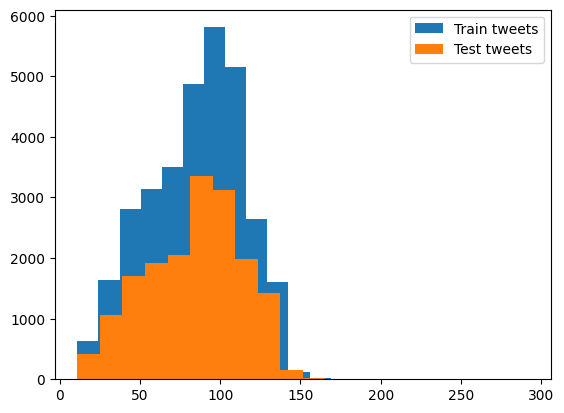

In [11]:
length_train_dataset=train['tweet'].str.len()
length_test_dataset=test['tweet'].str.len()
plt.hist(length_train_dataset,bins=20,label="Train tweets")
plt.hist(length_test_dataset,bins=20,label="Test tweets")
plt.legend()
plt.show()

In [12]:
combine = pd.concat([train, test], ignore_index=True)
combine.shape

(49159, 3)

In [13]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i,"",input_text)
    return input_text

In [14]:
combine['tidy_tweet']=np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")
combine.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_20524\1957994287.py:1: SyntaxWarning: invalid escape sequence '\w'
  combine['tidy_tweet']=np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,None
4,5,0.0,factsguide: society now #motivation,None


In [15]:
combine['tidy_tweet']=combine['tidy_tweet'].str.replace("^[a-zA-Z]","")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,None
4,5,0.0,factsguide: society now #motivation,None
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,None
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,None
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,None
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [16]:
combine['tidy_tweet']=combine['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split()if len(w)>3]))
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,None
4,5,0.0,factsguide: society now #motivation,None


In [17]:
tokenized_tweet=combine['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                                          [None]
3                                                                                                          [None]
4                                                                                                          [None]
Name: tidy_tweet, dtype: object

In [20]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combine['tidy_tweet']=tokenized_tweet

In [27]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


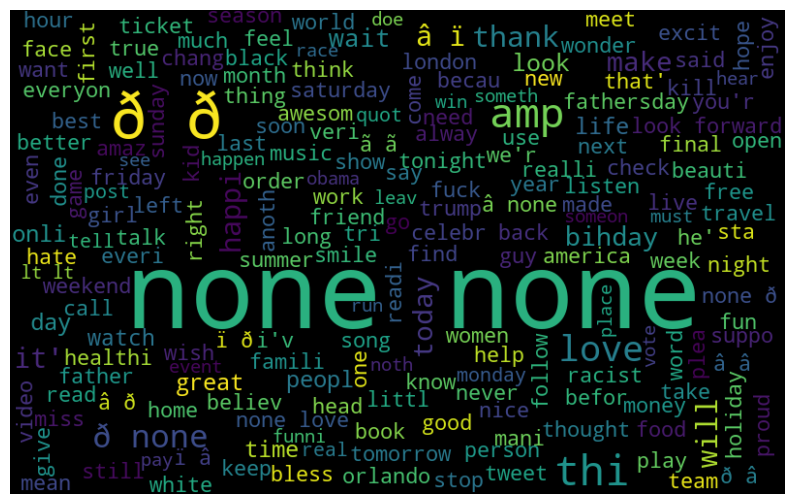

In [39]:
all_words=' '.join([text for text in combine['tidy_tweet']])
from wordcloud import WordCloud
normal_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

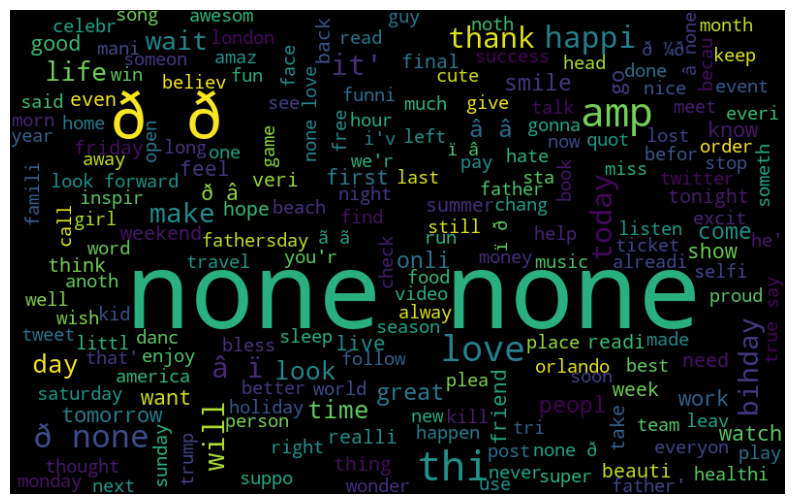

In [38]:
normal_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


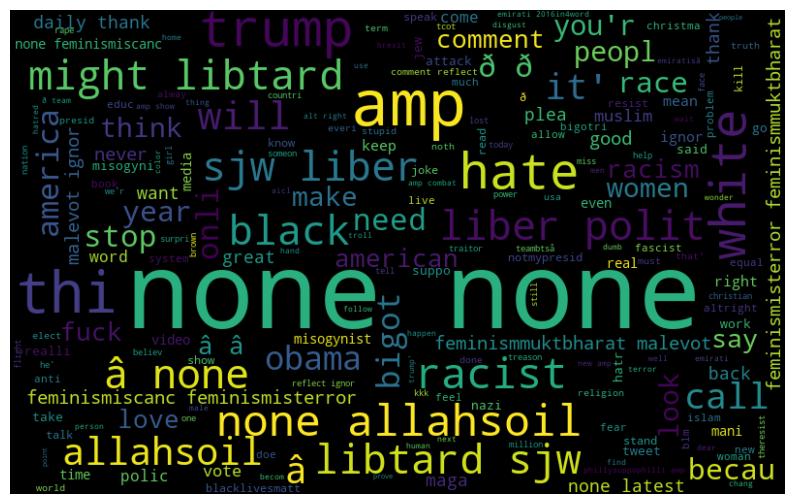

In [29]:
negative_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [31]:
ht_regular=hashtag_extract(combine['tidy_tweet'][combine['label']==0])
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular=sum(ht_regular,[])
ht_negative=sum(ht_negative,[])

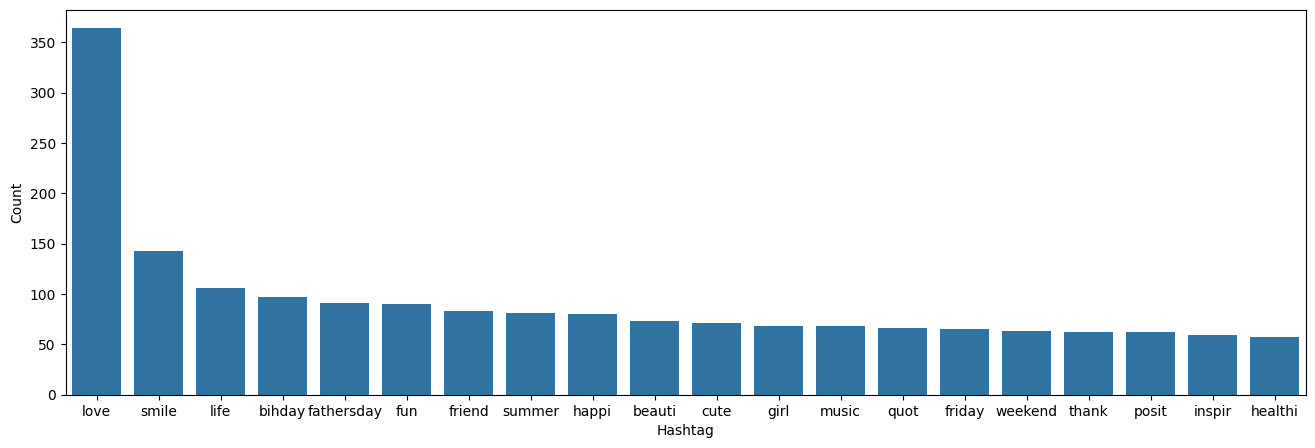

In [36]:
from nltk import FreqDist
nonracist_tweets = FreqDist(ht_regular)
df1=pd.DataFrame({'Hashtag':list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})
df1=df1.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

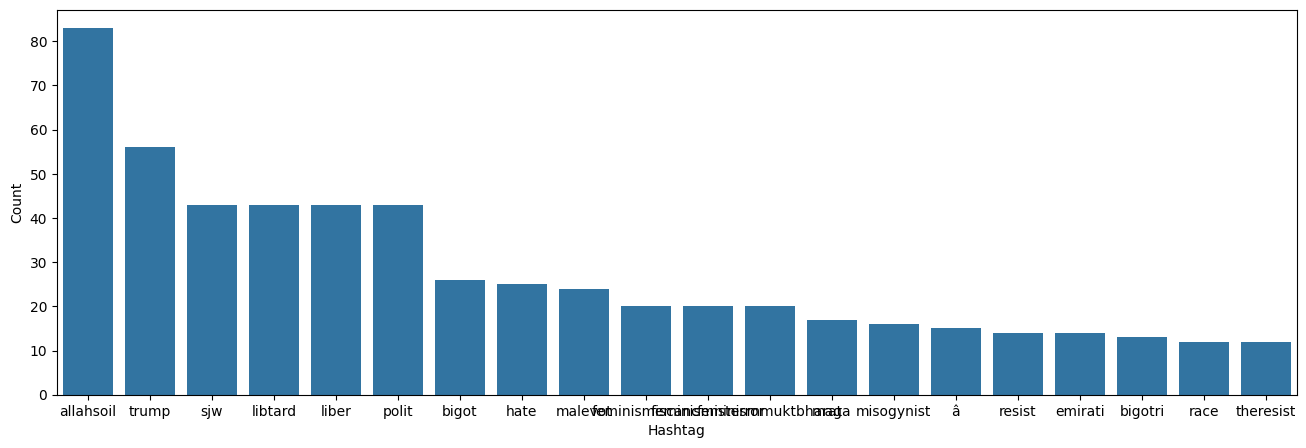

In [40]:
racist_tweets = FreqDist(ht_negative)
df2=pd.DataFrame({'Hashtag':list(racist_tweets.keys()),'Count':list(racist_tweets.values())})
df2=df2.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x='Hashtag', y='Count')
plt.show()

In [ ]:
!pip install gensim


In [ ]:
from sklearn.feature_extraction.text import TfidVectorizer,CountVectorizer
import gensim

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.50, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])



In [46]:
from sklearn.model_selection import train_test_split

combine = combine.fillna(0)  # Just make sure this is appropriate for your use case
X_train, X_test, Y_train, Y_test = train_test_split(bow, combine['label'], test_size=0.2, random_state=69)


In [48]:
print("X_train_shape: :",X_train.shape)
print("X_test_shape: :",X_test.shape)
print("Y_train_shape: :",Y_train.shape)
print("Y_test_shape: :",Y_test.shape)

X_train_shape: : (39327, 1000)
X_test_shape: : (9832, 1000)
Y_train_shape: : (39327,)
Y_test_shape: : (9832,)


In [50]:
from sklearn.naive_bayes import MultinomialNB
model_naive=MultinomialNB().fit(X_train,Y_train)
predicted_naive=model_naive.predict(X_test)

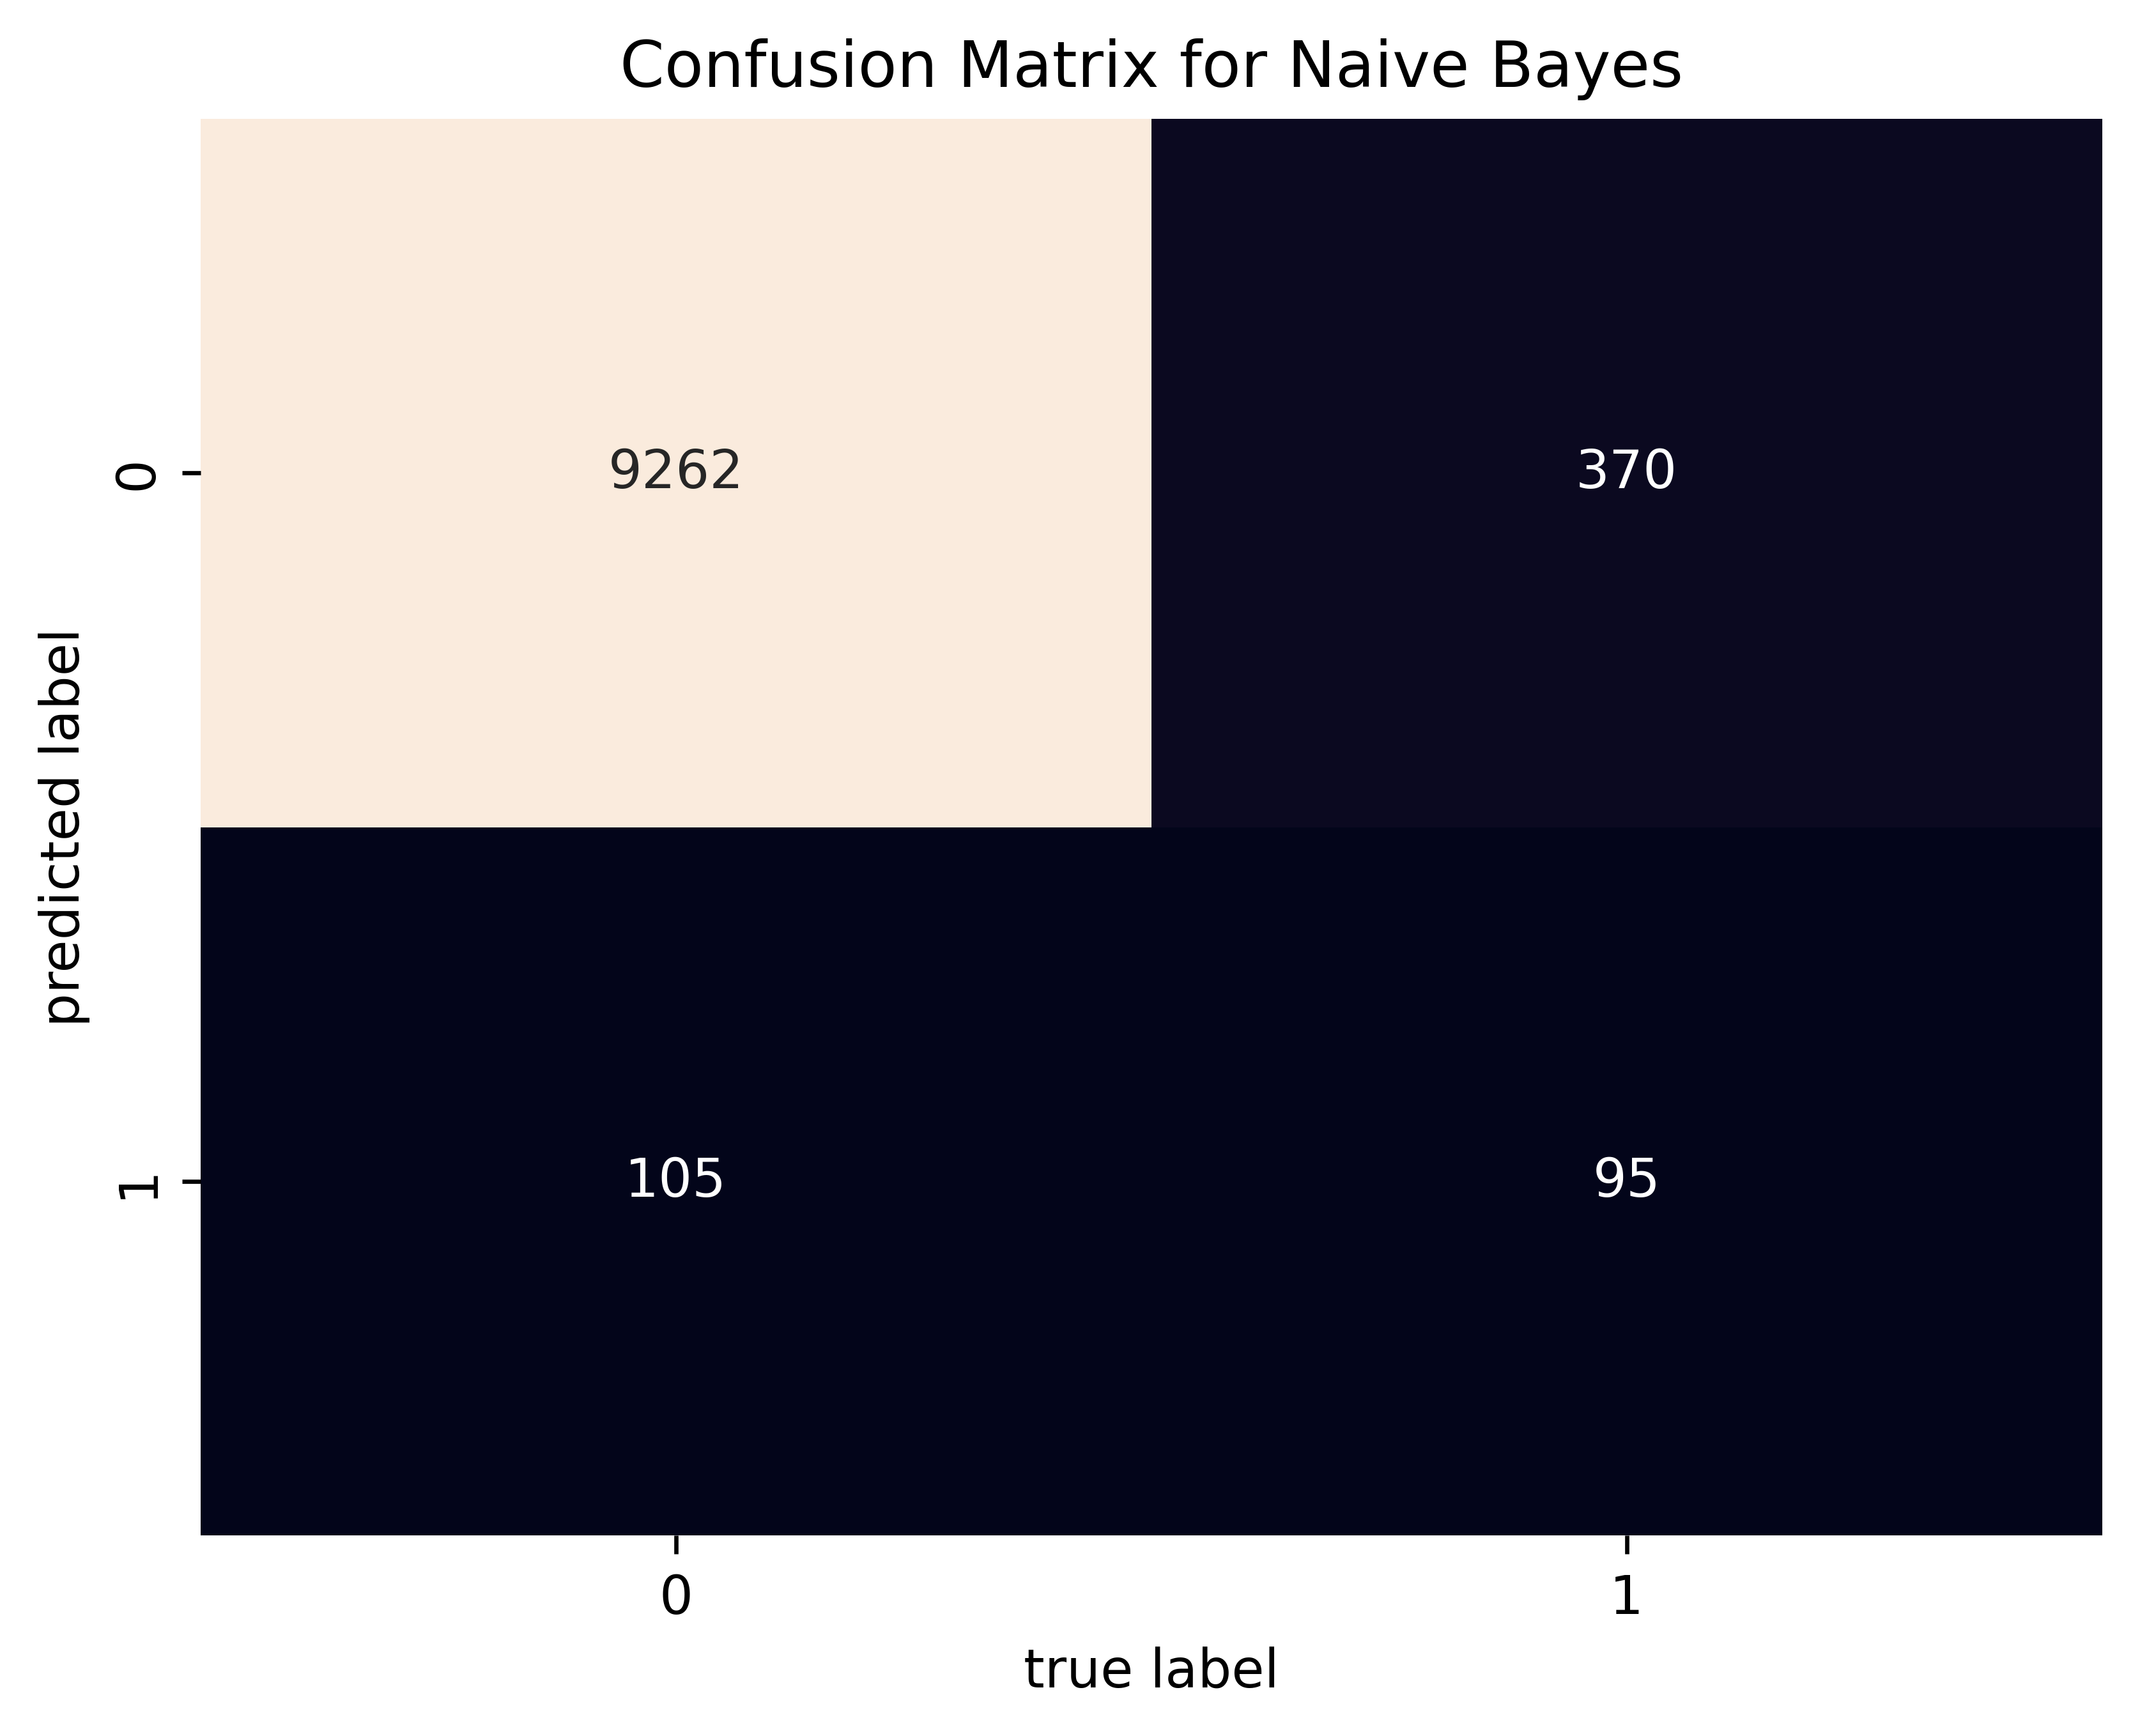

In [53]:
from sklearn.metrics import confusion_matrix
plt.figure(dpi=600)
mat=confusion_matrix(Y_test,predicted_naive)
sns.heatmap(mat.T,annot=True,fmt='d',cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig("confusion_matrix.png")
plt.show()


In [54]:
from sklearn.metrics import accuracy_score
score_naive=accuracy_score(predicted_naive,Y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9516883645240033


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [56]:
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, predictions))
print("\nClassification Report:\n", classification_report(Y_test, predictions))


Accuracy: 0.9538242473555736

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      9367
         1.0       0.56      0.10      0.17       465

    accuracy                           0.95      9832
   macro avg       0.76      0.55      0.58      9832
weighted avg       0.94      0.95      0.94      9832

